In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
train_dir = '/home/saloni/our_vgg/clean-dataset/train'
validation_dir = '/home/saloni/our_vgg/clean-dataset/test'
image_size = 256

In [3]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.topology.InputLayer object at 0x7f34f09c4190> False
<keras.layers.convolutional.Conv2D object at 0x7f34f09c43d0> False
<keras.layers.convolutional.Conv2D object at 0x7f34f0984dd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f34f0984b50> False
<keras.layers.convolutional.Conv2D object at 0x7f34f09c45d0> False
<keras.layers.convolutional.Conv2D object at 0x7f34f0945b50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f34f0945b10> False
<keras.layers.convolutional.Conv2D object at 0x7f34f08e3b50> False
<keras.layers.convolutional.Conv2D object at 0x7f34f08b9b90> False
<keras.layers.convolutional.Conv2D object at 0x7f34f08c6910> False
<keras.layers.pooling.MaxPooling2D object at 0x7f34f087a610> False
<keras.layers.convolutional.Conv2D object at 0x7f34f08557d0> False
<keras.layers.convolutional.Conv2D object at 0x7f34f0847d10> False
<keras.layers.convolutional.Conv2D object at 0x7f34f07609d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f34f0805cd0> Fa

Found 195 images belonging to 2 classes.
Found 94 images belonging to 2 classes.
Epoch 1/20
39/39 [==============================] - 39s - loss: 1.9387 - acc: 0.7949 - val_loss: 0.0657 - val_acc: 0.9556
Epoch 2/20
39/39 [==============================] - 36s - loss: 0.7418 - acc: 0.9333 - val_loss: 0.2610 - val_acc: 0.9663
Epoch 3/20
39/39 [==============================] - 33s - loss: 0.2749 - acc: 0.9744 - val_loss: 0.3203 - val_acc: 0.9326
Epoch 4/20
39/39 [==============================] - 43s - loss: 0.1607 - acc: 0.9846 - val_loss: 0.3609 - val_acc: 0.9438
Epoch 5/20
39/39 [==============================] - 52s - loss: 0.0872 - acc: 0.9846 - val_loss: 0.4177 - val_acc: 0.8989
Epoch 6/20
39/39 [==============================] - 49s - loss: 0.0088 - acc: 0.9949 - val_loss: 1.2769 - val_acc: 0.8764
Epoch 7/20
39/39 [==============================] - 43s - loss: 7.6027e-04 - acc: 1.0000 - val_loss: 1.5984e-04 - val_acc: 1.0000
Epoch 8/20
39/39 [==============================] - 55s -

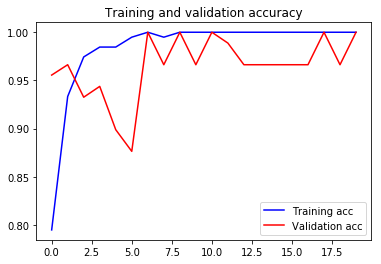

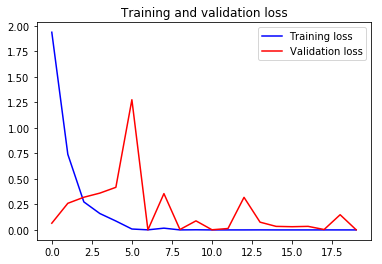

In [6]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=None)
validation_datagen = ImageDataGenerator(rescale=None)

# Change the batchsize according to your system RAM
train_batchsize = 5
val_batchsize = 5

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size)

# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()